Problem Statement: Classification problem for Loan Default Prediction

Uploaded Data: content/data/test_data.xlsx        
             content/data/train_data.xlsx

Import Required Libraries:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Load Data:

In [3]:
train_df = pd.read_excel('/content/data/train_data.xlsx')
test_df = pd.read_excel('/content/data/test_data.xlsx')


**Initial Exploration**:
Perform a quick analysis to understand the dataset.


In [4]:
# Data Overview
print("Train Data Overview")
print(train_df.head())



Train Data Overview
   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0    

In [5]:
# Check for missing values
print("\nMissing Values in Training Data")
print(train_df.isnull().sum())





Missing Values in Training Data
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [6]:
# Check data types
print("\nData Types of Columns")
print(train_df.dtypes)


Data Types of Columns
customer_id                     int64
transaction_date       datetime64[ns]
sub_grade                      object
term                           object
home_ownership                 object
cibil_score                     int64
total_no_of_acc                 int64
annual_inc                    float64
int_rate                      float64
purpose                        object
loan_amnt                       int64
application_type               object
installment                   float64
verification_status            object
account_bal                     int64
emp_length                      int64
loan_status                     int64
dtype: object


Explanation:


*   We inspect the first few rows to understand the structure.
*   Missing values are identified for imputation strategies.
*   Data types are verified to handle numerical and categorical columns
   correctly.







**Univariate Analysis**
Visualize key features one by one.

**1. Numerical Variables**

Distribution of loan_amnt (Loan Amount)


Summary Statistics for 'loan_amnt':
count    113705.000000
mean      15158.144980
std        9091.279851
min        1000.000000
25%        8000.000000
50%       13300.000000
75%       20225.000000
max       40000.000000
Name: loan_amnt, dtype: float64


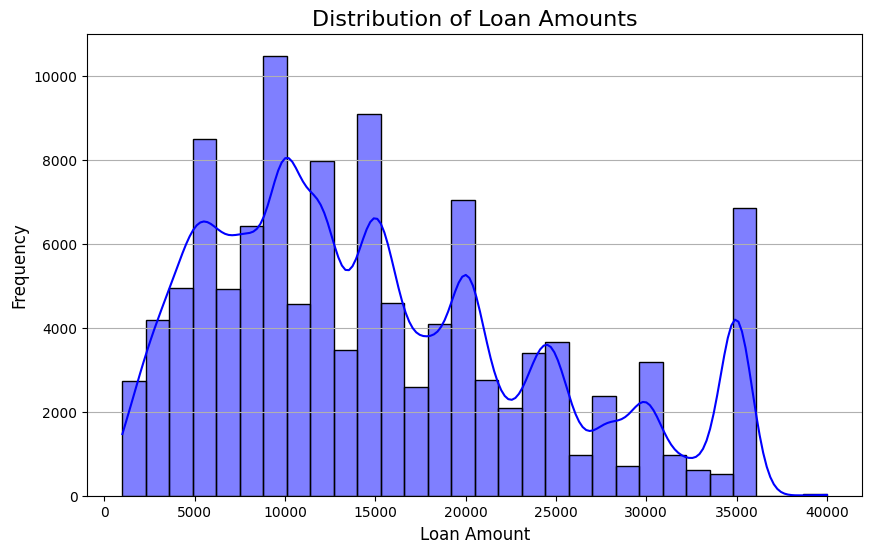

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print("Summary Statistics for 'loan_amnt':")
print(train_df['loan_amnt'].describe())

# Plotting histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_df['loan_amnt'], kde=True, bins=30, color='blue')
plt.title("Distribution of Loan Amounts", fontsize=16)
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y')
plt.show()




*   Purpose: Understand the range, central tendency, and skewness of loan amounts.

*   Explanation:
sns.histplot shows the frequency of values and a kernel density estimate (KDE) for smooth distribution visualization.
describe() provides numerical insights like mean, standard deviation, min, and max.



Distribution of int_rate (Interest Rate)

Summary Statistics for 'int_rate':
count    113705.000000
mean         15.955469
std           3.234215
min          12.050000
25%          13.330000
50%          14.990000
75%          17.860000
max          28.990000
Name: int_rate, dtype: float64


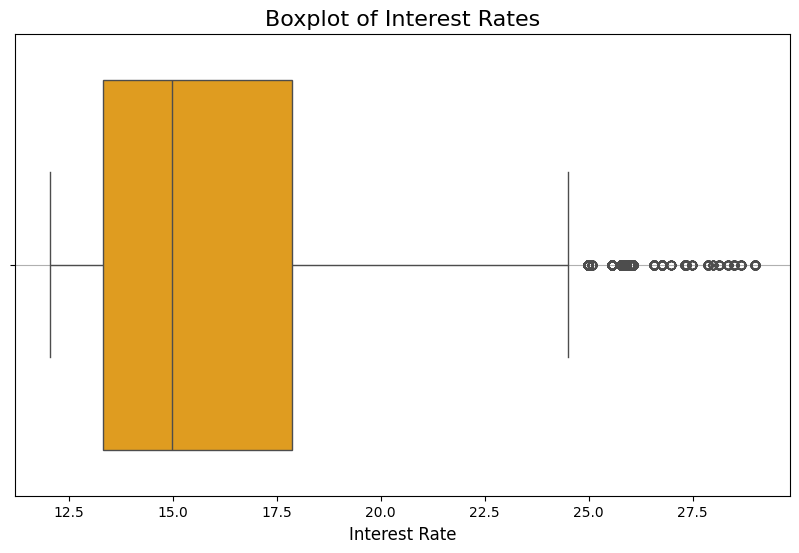

In [9]:
# Summary statistics
print("Summary Statistics for 'int_rate':")
print(train_df['int_rate'].describe())

# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['int_rate'], color='orange')
plt.title("Boxplot of Interest Rates", fontsize=16)
plt.xlabel("Interest Rate", fontsize=12)
plt.grid(axis='y')
plt.show()




*   Purpose: Identify outliers and variability in interest rates.
*   Explanation:
Boxplots visualize the interquartile range (IQR), median, and potential outliers.
The whiskers show the spread of most data points, and dots represent outliers.



**2.Categorical Variables**

Categorical variables provide insights into the frequency and proportion of categories. Techniques like bar plots and pie charts are common.



Loan Status (loan_status)


Loan Status Counts:
loan_status
1    84016
0    29689
Name: count, dtype: int64


<ipython-input-10-36ed69e35815>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=train_df, palette='Set2')


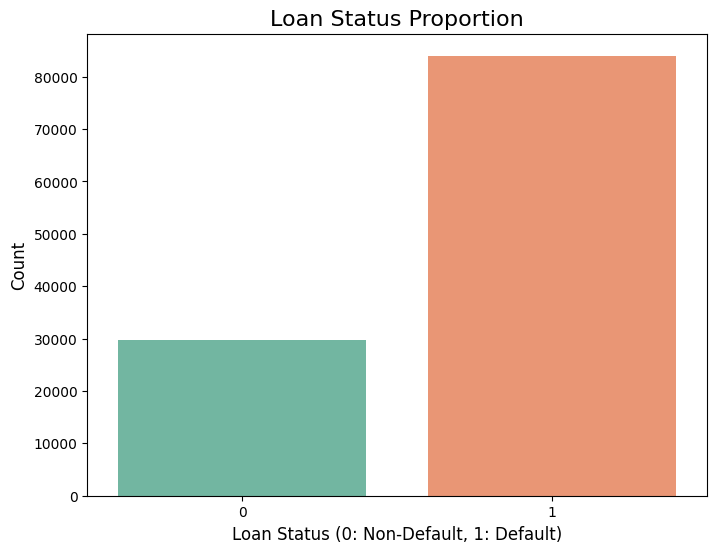

In [10]:
# Frequency counts
print("Loan Status Counts:")
print(train_df['loan_status'].value_counts())

# Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=train_df, palette='Set2')
plt.title("Loan Status Proportion", fontsize=16)
plt.xlabel("Loan Status (0: Non-Default, 1: Default)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()




*   Purpose: Understand the balance of default vs. non-default cases in the dataset.
*   Explanation:
value_counts() shows the exact distribution of loan status.
The bar plot visualizes the proportion of defaults and non-defaults.



Purpose of Loan (purpose)

Loan Purpose Counts:
purpose
debt_consolidation    71770
credit_card           18830
other                  7351
home_improvement       6865
major_purchase         2060
small_business         1759
medical                1485
moving                 1074
vacation                887
car                     881
house                   642
renewable_energy         95
wedding                   6
Name: count, dtype: int64


<ipython-input-11-4fec0701bba9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='purpose', data=train_df, palette='coolwarm', order=train_df['purpose'].value_counts().index)


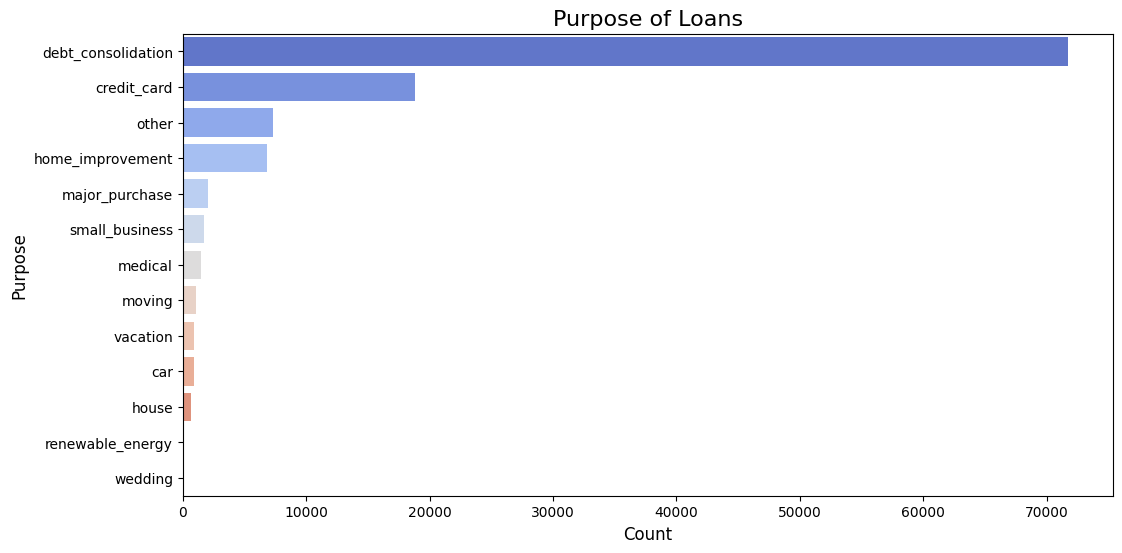

In [11]:
# Frequency counts
print("Loan Purpose Counts:")
print(train_df['purpose'].value_counts())

# Bar plot
plt.figure(figsize=(12, 6))
sns.countplot(y='purpose', data=train_df, palette='coolwarm', order=train_df['purpose'].value_counts().index)
plt.title("Purpose of Loans", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Purpose", fontsize=12)
plt.show()




*   Purpose: Determine the most common reasons for taking loans.

*   Explanation:
The order parameter sorts the bar plot based on frequency.
Horizontal bar plots are useful when category names are long.



**3.Outlier Detection**

Outliers can distort model performance. Identifying them is crucial during EDA.

Outliers in annual_inc (Annual Income)

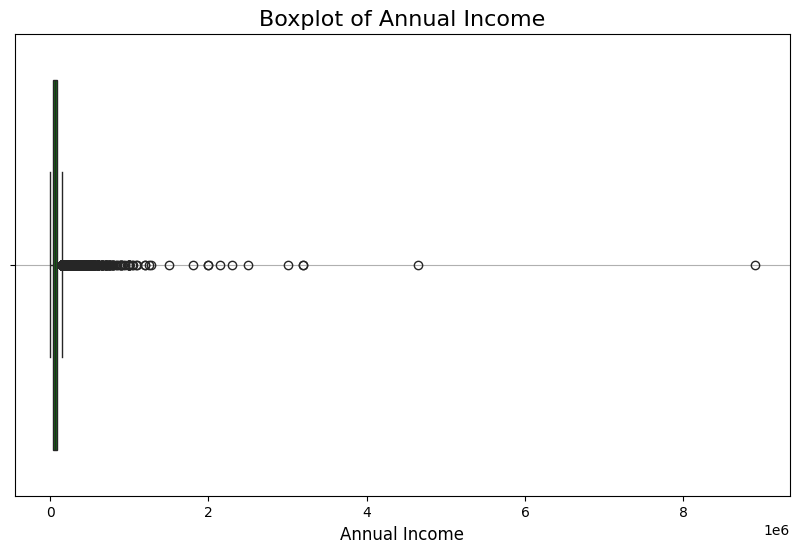

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['annual_inc'], color='green')
plt.title("Boxplot of Annual Income", fontsize=16)
plt.xlabel("Annual Income", fontsize=12)
plt.grid(axis='y')
plt.show()




*   Purpose: Identify extreme income values.
*   Explanation:
The boxplot highlights the central 50% of the data.
Outliers are marked as points beyond the whiskers.



**Multivariate Analysis**

Explore relationships between features.

CIBIL Score vs Loan Status

<ipython-input-14-3231c759458c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='cibil_score', data=train_df, palette='coolwarm')


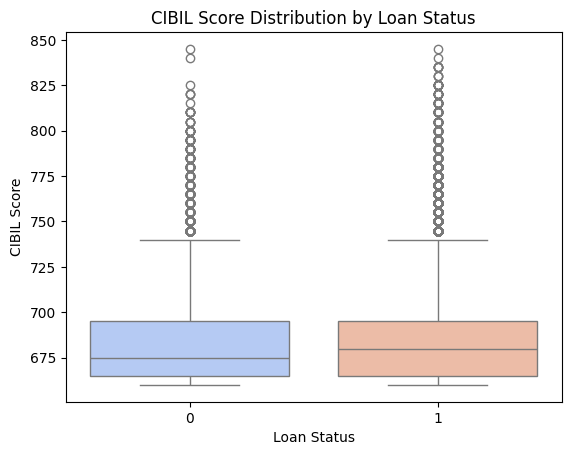

In [14]:
sns.boxplot(x='loan_status', y='cibil_score', data=train_df, palette='coolwarm')
plt.title("CIBIL Score Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Score")
plt.show()


Correlation Heatmap

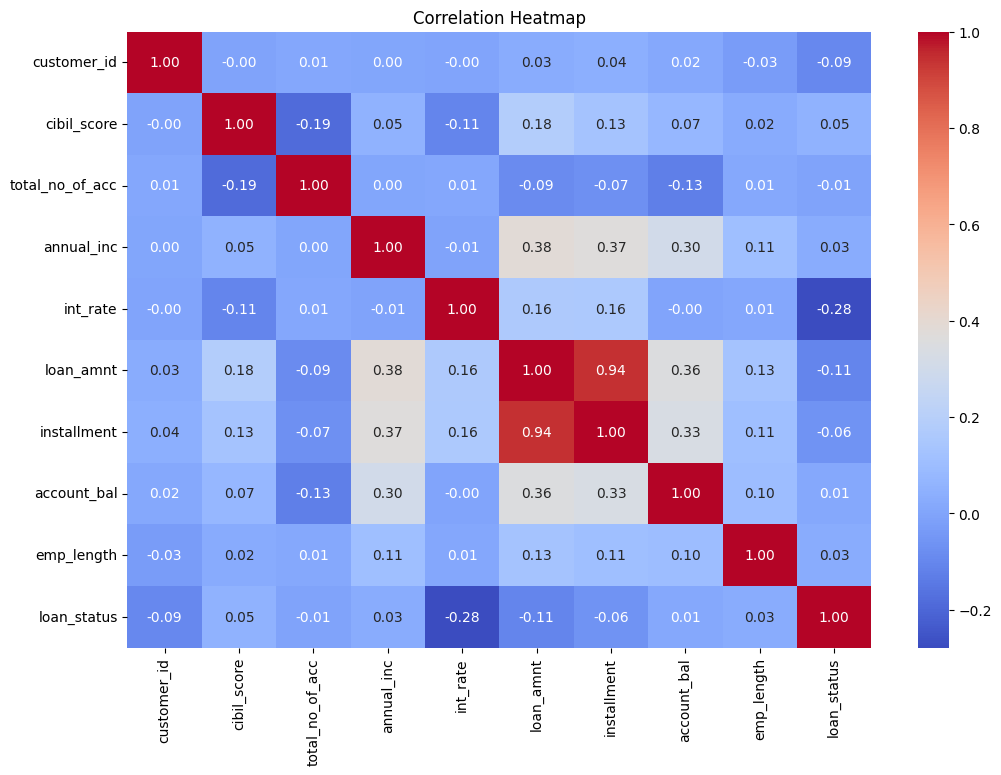

In [16]:
corr_matrix = train_df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Explanation:
Boxplots help us identify patterns in numerical variables by loan status.Heatmaps visualize correlations between all numerical features.

Observations
In markdown cells, document insights such as:

CIBIL Score: Higher scores reduce the likelihood of default.

Loan Amount: Larger loans might have a higher risk of default.

In [28]:
!pip install pandas scikit-learn openpyxl


In [29]:
%%writefile model_.py


Writing model_.py


Training LogisticRegression model...
Traceback (most recent call last):
  File "/content/scripts/model_.py", line 98, in <module>
    model.train(X_train, y_train)
  File "/content/scripts/model_.py", line 59, in train
    self.model.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1223, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 887, in check_array
    dtype_orig = np.result_type(*dtypes_orig)
numpy.exceptions.DTypePromotionError: The DType <class 'numpy.d